## Numerical operations on arrays
### Elementwise operations
#### Basic operations


- With scalars:

In [2]:
import numpy as np
a = np.array([1,2,3,4])
a + 2

array([3, 4, 5, 6])

In [3]:
2 ** a

array([ 2,  4,  8, 16])

- All arithmetic operates elementwise:

In [6]:
b = np.ones(4) + 1
b

array([2., 2., 2., 2.])

In [7]:
a - b

array([-1.,  0.,  1.,  2.])

In [8]:
a * b

array([2., 4., 6., 8.])

In [13]:
c = np.arange(5)
2 ** (c + 1) - c

array([ 2,  3,  6, 13, 28])

* These operations are of course much faster than if you did them in pure python:

In [16]:
a = np.arange(10000)
%timeit a + 1

5.67 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
l = range(10000)
%timeit [x+1 for x in l]

636 µs ± 21.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



#### Other operations


- Comparisons:

In [19]:
a = np.array([1,2,3,4])
b = np.array([4,2,2,4])
a == b

array([False,  True, False,  True])

In [20]:
a > b

array([False, False,  True, False])

- Array-wise comparisons:

In [22]:
a = np.array([1,2,3,4])
b = np.array([4,2,2,4])
c = np.array([1,2,3,4])

np.array_equal(a,b)

False

In [23]:
np.array_equal(a,c)

True

- Logical operations:

In [25]:
a = np.array([1,1,0,0], dtype=bool)
b = np.array([1,0,1,0], dtype=bool)

a

array([ True,  True, False, False])

In [26]:
b

array([ True, False,  True, False])

In [27]:
np.logical_or(a, b)

array([ True,  True,  True, False])

In [29]:
np.logical_and(a,b)

array([ True, False, False, False])

- Transcendental functions:

In [33]:
a = np.arange(5)

In [34]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [37]:
np.log(a + 1)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

In [38]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

- Shape mismatches

In [39]:
a = np.arange(4)
a + np.array([1,2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

- Transposition

In [40]:
a = np.triu(np.ones((3,3)),1)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])


### Basic reductions

#### Computing sums


In [43]:
x = np.array([1,2,3,4])
x.sum()

10

In [48]:
np.sum(x)

6

- Sum by rows and by columns:

In [45]:
x = np.array([[1,1],[2,2]])
x

array([[1, 1],
       [2, 2]])

In [47]:
x.sum(axis=0)   # columns (first dimension)

array([3, 3])

In [50]:
x.sum(axis=1)    # rows (second dimension)

array([2, 4])

-  Same idea in higher dimensions:

In [53]:
x = np.random.rand(2,3,4)
x

array([[[0.52644265, 0.94610055, 0.0059123 , 0.9230092 ],
        [0.95123081, 0.02416597, 0.10484493, 0.00164349],
        [0.44280224, 0.1626754 , 0.64352379, 0.44690721]],

       [[0.40010412, 0.22979135, 0.94220167, 0.48051935],
        [0.04930491, 0.37676013, 0.48676181, 0.38810855],
        [0.53283405, 0.02556139, 0.43994066, 0.5712958 ]]])

In [66]:
x[0,1].sum(axis=0)

1.0818852043770306

In [79]:
x.sum(axis=0)

array([[0.92654677, 1.1758919 , 0.94811397, 1.40352855],
       [1.00053572, 0.40092609, 0.59160674, 0.38975204],
       [0.97563629, 0.18823679, 1.08346446, 1.01820301]])

In [80]:
x.sum(axis=1)

array([[1.9204757 , 1.13294192, 0.75428102, 1.3715599 ],
       [0.98224308, 0.63211286, 1.86890414, 1.4399237 ]])

In [81]:
x.sum(axis=2)

array([[2.40146471, 1.0818852 , 1.69590864],
       [2.05261649, 1.30093539, 1.56963191]])

In [82]:
x.sum(axis=2)[0,1]

1.0818852043770306

In [56]:
x[0,1,:].sum()

1.0818852043770306

#### Other reductions

works the same way (and take `axis=`)

- Extrema:

In [83]:
x = np.array([1,3,2])

In [84]:
x.min()

1

In [85]:
x.max()

3

In [86]:
x.argmin()    # index of minimum

0

In [87]:
x.argmax()  # index of maximum

1

- Logical operations:

In [88]:
np.all([True, True, False])

False

In [89]:
np.any([True, True, False])

True

In [93]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c)).all()

True

- Statistics:

In [99]:
x = np.array([1,2,3,1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()

1.75

In [100]:
np.median(x)

1.5

In [98]:
np.median(y, axis=-1) # last axis

array([2., 5.])

### Broadcasting
![](http://www.scipy-lectures.org/_images/numpy_broadcasting.png)

In [116]:
a =np.tile( np.arange(0, 40, 10),(3,1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [124]:
b = np.array([1,2,3])

In [125]:
a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [127]:
a = np.ones((4, 5))
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [128]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544,1913, 2448])

In [129]:
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])

In [130]:
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

In [131]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]

In [134]:
distance = np.sqrt(x ** 2 + y ** 2)

In [135]:
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

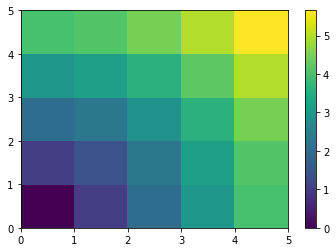

In [143]:
import  matplotlib.pyplot  as plt
plt.pcolor(distance)
plt.colorbar()   

- **Remark** : the `numpy.ogrid()` function allows to directly create vectors x and y of the previous example, with two “significant dimensions”:

In [139]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [140]:
x.shape, y.shape

((5, 1), (1, 5))

In [142]:
distance = np.sqrt(x ** 2 + y **  2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

In [144]:
x , y = np.mgrid[0:4,0:4]

In [146]:
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [147]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

### Array shape manipulation
#### Flattening

In [148]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [149]:
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [150]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [151]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

#### Reshaping

In [153]:
a.shape

(2, 3)

In [156]:
b = a.ravel()
b = b.reshape((2,3))
b

array([[1, 2, 3],
       [4, 5, 6]])

#### Adding a dimension

In [158]:
z = np.array([1,2,3])
z

array([1, 2, 3])

In [159]:
z[np.newaxis, : ]

array([[1, 2, 3]])

In [161]:
z[: , np.newaxis]

array([[1],
       [2],
       [3]])

#### Dimension shuffling

In [166]:
a = np.arange(4*3*2).reshape(4,3,2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [168]:
a.shape

(4, 3, 2)

In [169]:
a[0,2,1]

5

In [178]:
b = a.transpose()
b

array([[[ 0,  6, 12, 18],
        [ 2,  8, 14, 20],
        [ 4, 10, 16, 22]],

       [[ 1,  7, 13, 19],
        [ 3,  9, 15, 21],
        [ 5, 11, 17, 23]]])

In [180]:
b = a.transpose(1,2,0)
b

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19]],

       [[ 2,  8, 14, 20],
        [ 3,  9, 15, 21]],

       [[ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [181]:
b.shape

(3, 2, 4)

In [182]:
b[2,1,0]

5

#### Resizing

In [190]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

### Sorting data

- Sorting along an axis:

In [191]:
a = np.array([[4, 3, 5], [1, 2, 1]])
a

array([[4, 3, 5],
       [1, 2, 1]])

In [195]:
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

- In-place sort:

In [196]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

- Sorting with fancy indexing:

In [197]:
a = np.array([4,1,3,2])
j = np.argsort(a)
j

array([1, 3, 2, 0])

In [198]:
a[j]

array([1, 2, 3, 4])

- Finding minima and maxima:

In [199]:
j_max = np.argmax(a)

In [201]:
j_min = np.argmin(a)
j_max, j_min

(0, 1)